In [1]:
import pandas as pd
import numpy as np
import bnlearn as bn

In [11]:
class ModelBN:
    def __init__(self,pa,pb,p111,p110,p101,p100):
        self.pa=pa
        self.pb=pb 
        self.p111=p111 
        self.p110=p110 
        self.p101=p101 
        self.p100=p100
        
    def jointprob(self,a,b,c):
        p=self.p111*self.pa*self.pb*a*b\
            + self.p110*self.pa*(1-self.pb)*a*(1-b)\
            +self.p101*(1-self.pa)*self.pb*(1-a)*b\
                +self.p100*(1-self.pa)*(1-self.pb)*(1-a)*(1-b)
            
        return p*c+(1-p)*(1-c)
    
    def pc_ab(self,a,b):
        p=self.p111*a*b+self.p110*a*(1-b)+self.p101*(1-a)*b+self.p100*(1-a)*(1-b)
        return p
    
    def generate(self,N):
        prob=np.random.uniform(0,1,(N,3))
        pab=np.array([self.pa,self.pb])
        events=[]
        for p in prob:
            idx=p[:2]<=pab
            idx=idx.astype('int')
            pc=self.pc_ab(idx[0],idx[1])
            k=int(p[2]<=pc)
            events.append([idx[0],idx[1],k])
        
        return events

In [12]:
model=ModelBN(0.2,0.5,0.7,0.8,0.4,0.6)

In [42]:
data=model.generate(100000)

In [43]:
data=pd.DataFrame(data,columns=['a','b','c'])
data

,a,b,c
0,0,1,1
1,0,0,1
2,1,1,1
3,0,1,0
4,0,0,1
...,...,...,...
99995,0,1,1
99996,0,0,0
99997,1,0,1
99998,0,1,0


In [44]:
pa=(data['a']==1).sum()
pa=pa/data.shape[0]

pb=(data['b']==1).sum()
pb=pb/data.shape[0]

print(pa)
print(pb)

0.19798
0.4984


In [45]:
L1=0
N=data.shape[0]
Na=(data['a']==1).sum()
Nb=(data['b']==1).sum()
pa=Na/N
pb=Nb/N

L1+=Na*np.log(pa)+(N-Na)*np.log(1-pa)
L1+=Nb*np.log(pa)+(N-Nb)*np.log(1-pb)

pc={}
for i in range(2):
    for j in range(2):
        Nc=((data['a']==i) & (data['b']==j) & (data['c']==1)).sum()
        Nij=((data['a']==i) & (data['b']==j)).sum()
        p=Nc/Nij
        pc[(i,j)]=p
        L1+=Nc*np.log(p)+(Nij-Nc)*np.log(1-p)
L1=-L1/N
S1=L1*N+np.log(N)/2*(1+1+4)

print(L1)
print(S1)

2.3007486068108243
230109.39945747732


In [46]:
L2=0
N=data.shape[0]
Na=(data['a']==1).sum()
Nb=(data['b']==1).sum()
Nc=(data['c']==1).sum()
pa=Na/N
pb=Nb/N
pc=Nc/N

L2+=Na*np.log(pa)+(N-Na)*np.log(1-pa)
L2+=Nb*np.log(pa)+(N-Nb)*np.log(1-pb)
L2+=Nc*np.log(pc)+(N-Nc)*np.log(1-pc)

L2=-L2/N
S2=L2*N+np.log(N)/2*(1+1+1)

print(L2)
print(S2)

2.338906601374411
233907.92952563855


In [47]:
L3=0
N=data.shape[0]
Na=(data['a']==1).sum()
Nb=(data['b']==1).sum()
pa=Na/N
pb=Nb/N

L3+=Na*np.log(pa)+(N-Na)*np.log(1-pa)
L3+=Nb*np.log(pa)+(N-Nb)*np.log(1-pb)

pc={}
for i in range(2):
        Nc=((data['b']==i) & (data['c']==1)).sum()
        Ni=(data['b']==i).sum()
        p=Nc/Ni
        pc[i]=p
        L3+=Nc*np.log(p)+(Ni-Nc)*np.log(1-p)
L3=-L3/N
S3=L3*N+np.log(N)/2*(1+1+2)

print(L3)
print(S3)

2.322365927044119
232259.61855534182


In [49]:
L4=0
N=data.shape[0]
Na=(data['a']==1).sum()
pa=Na/N

L4+=Na*np.log(pa)+(N-Na)*np.log(1-pa)

pc={}
pb={}
for i in range(2):
    Nb=((data['a']==i) & (data['b']==1)).sum()
    Ni=(data['a']==i).sum()
    p=Nb/Ni
    pb[i]=p
    L4+=Nb*np.log(p)+(Ni-Nb)*np.log(1-p)

    for j in range(2):
        Nc=((data['a']==i) & (data['b']==j) & (data['c']==1)).sum()
        Nij=((data['a']==i) & (data['b']==j)).sum()
        p=Nc/Nij
        pc[(i,j)]=p
        L4+=Nc*np.log(p)+(Nij-Nc)*np.log(1-p)
L4=-L4/N
S4=L4*N+np.log(N)/2*(1+2+4)

print(L4)
print(S4)

1.8406062741149034
184100.92265061772


In [51]:
pb

{0: 0.49804244283184956, 1: 0.499848469542378}

In [62]:
Na0=(data['a']==0).sum()
Na1=(data['a']==1).sum()
N=data.shape[0]

In [64]:
samples=[]
for i in range(1000):
    s=data['b'].sample(N,replace=False)
    m1=s[:Na0].mean()
    m2=s[Na0:].mean()
    samples.append(m1-m2)
samples=np.array(samples)

In [66]:
q975=np.quantile(samples,0.975)
q25=np.quantile(samples,0.025)

In [68]:
pb[1]-pb[0]

0.00180602671052843

In [71]:
q25

-0.007729170580318595

In [72]:
model = bn.structure_learning.fit(data)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn] >Plot based on BayesianModel


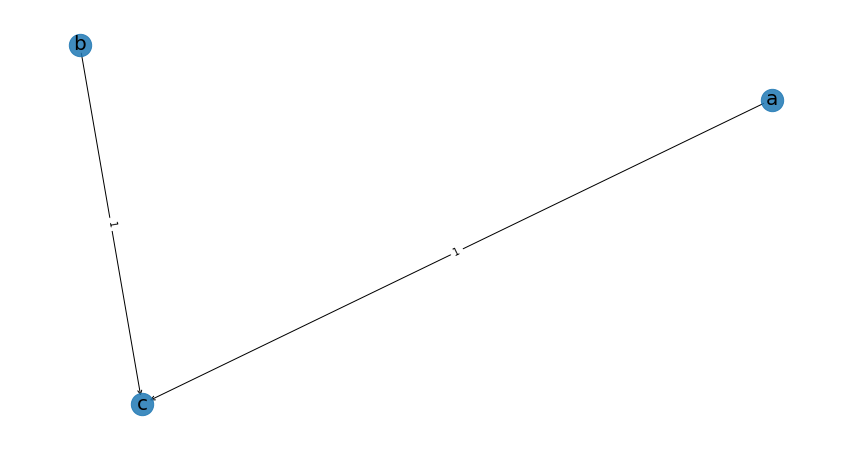

In [73]:
G = bn.plot(model)